In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [71]:
!pip install xgboost

In [72]:
from xgboost import XGBClassifier

In [73]:
# The dataset we will use here to perform the analysis and build a predictive model is Tesla Stock Price data.

df = pd.read_csv('TSLA.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


From the first five rows, we can see that data for some of the dates is missing the reason for that is on weekends and
holidays Stock Market remains closed hence no trading happens on these days.


In [74]:
df.shape

(2416, 7)

In [75]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


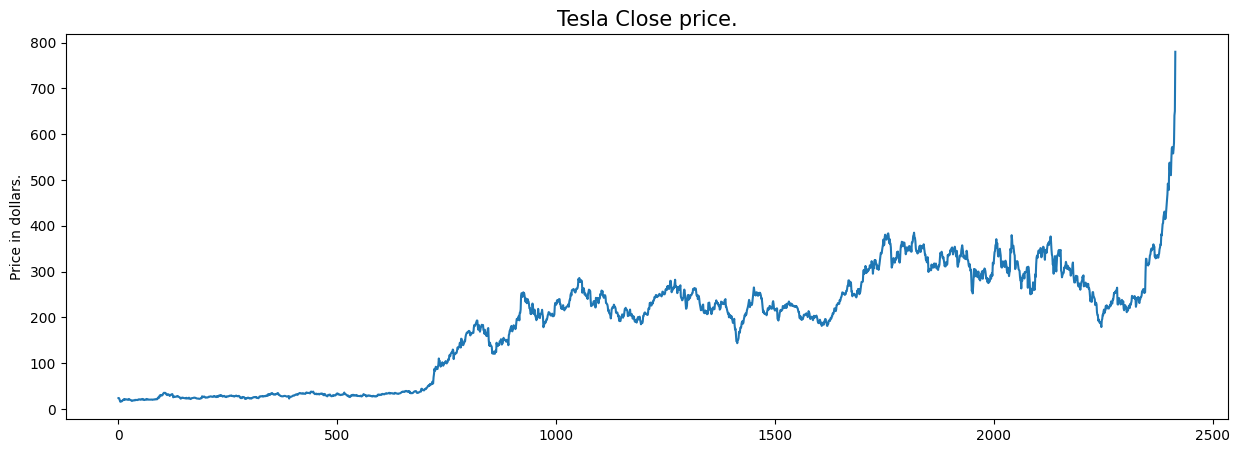

In [77]:
# Exploratory Data Analysis
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Tesla Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

The prices of tesla stocks are showing an upward trend as depicted by the plot of the closing price of the stocks.

In [78]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


If we observe carefully we can see that the data in the ‘Close’ column and that available in the ‘Adj Close’ column is the same let’s check whether this is the case with each row or not.

In [79]:
df[df['Close'] == df['Adj Close']].shape

(2416, 7)

From here we can conclude that all the rows of columns ‘Close’ and ‘Adj Close’ have the same data. So, having redundant data in the dataset is not going to help so, we’ll drop this column before further analysis.

In [80]:
df = df.drop(['Adj Close'], axis=1)

Now let’s draw the distribution plot for the continuous features given in the dataset. Before moving further let’s check for the null values if any are present in the data frame.

In [81]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

This implies that there are no null values in the data set provided.

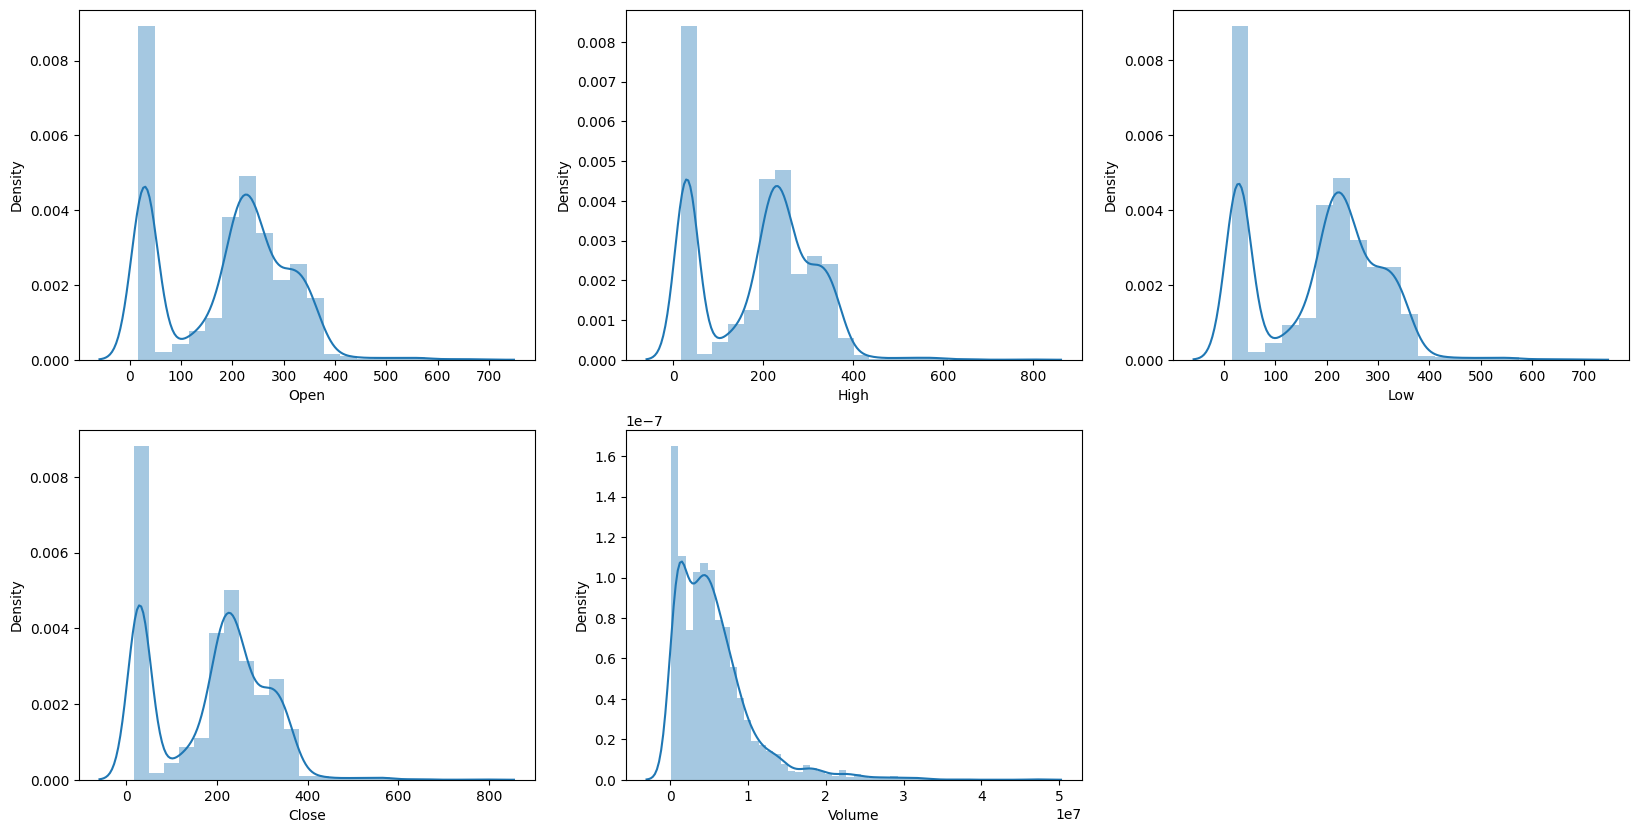

In [82]:
features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sb.distplot(df[col])
plt.show()

In the distribution plot of data, we can see two peaks which means the data has varied significantly in two regions. And the Volume data is left-skewed.

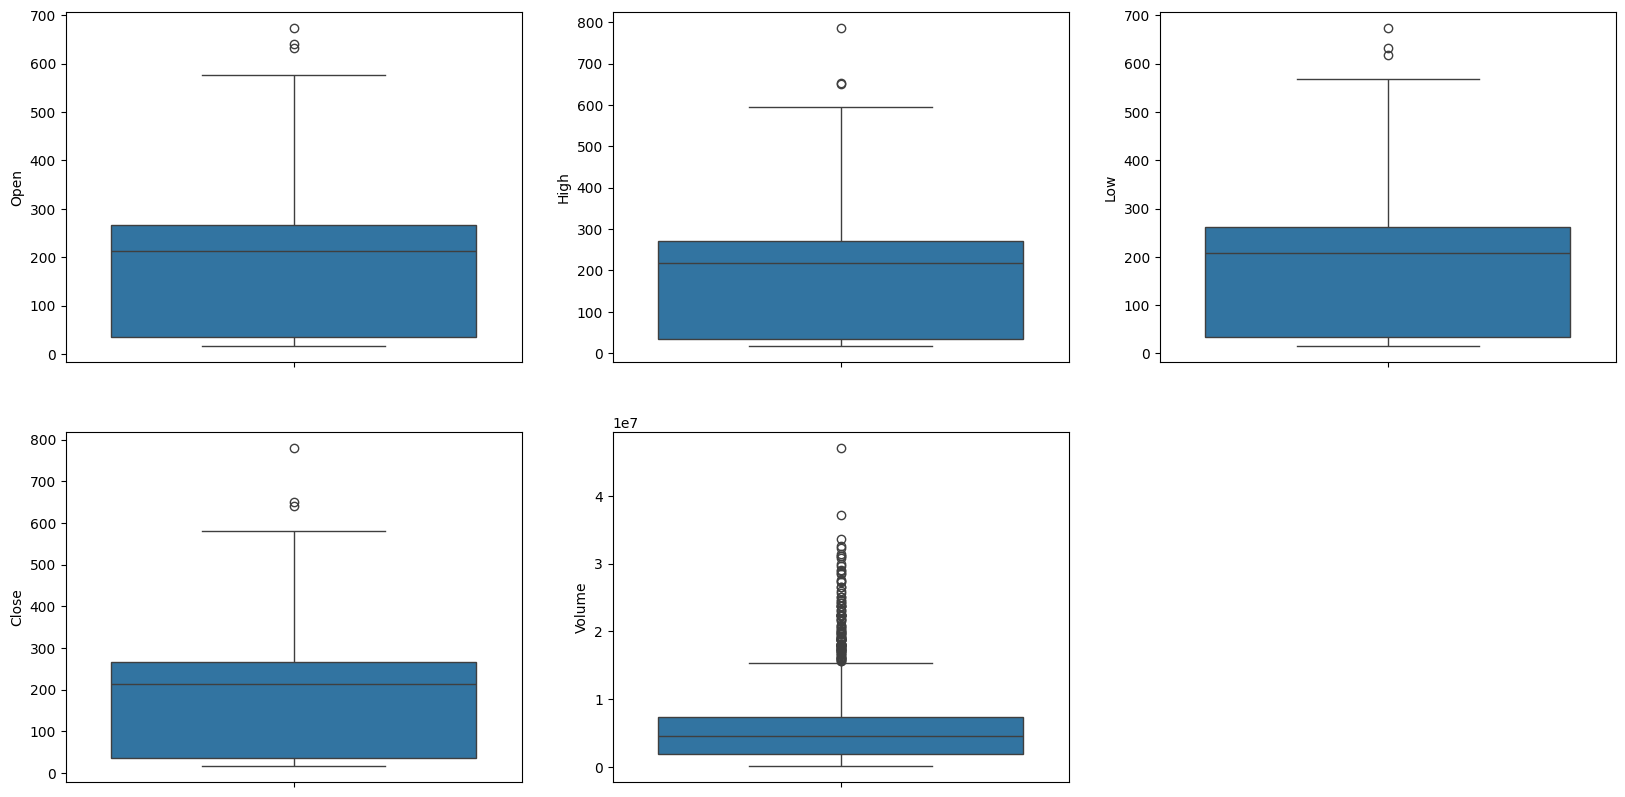

In [83]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sb.boxplot(df[col])
plt.show()

From the above boxplots, we can conclude that data contains outliers.

In [84]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900


In [85]:
#Feature Engineering
splitted = df['Date'].str.split('-', expand=True)

df['day'] = splitted[2].astype('int')
df['month'] = splitted[1].astype('int')
df['year'] = splitted[0].astype('int')

df.head()

,Date,Open,High,Low,Close,Volume,day,month,year
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,29,6,2010
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,30,6,2010
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,1,7,2010
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,2,7,2010
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,6,7,2010


Now we have three more columns namely ‘day’, ‘month’ and ‘year’ all these three have been derived from the ‘Date’ column which was initially provided in the data.

In [86]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

,Date,Open,High,Low,Close,Volume,day,month,year,is_quarter_end
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,29,6,2010,1
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,30,6,2010,1
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,1,7,2010,0
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,2,7,2010,0
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,6,7,2010,0


In [88]:
df['open-close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
df.head()

,Date,Open,High,Low,Close,Volume,day,month,year,is_quarter_end,open-close,low-high,target
0,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,29,6,2010,1,-4.889999,-7.459999,0
1,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,30,6,2010,1,1.960001,-7.120001,0
2,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,1,7,2010,0,3.040001,-5.650000,0
3,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,2,7,2010,0,3.799999,-4.390001,0
4,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,6,7,2010,0,3.889999,-4.170000,0


Above we have added some more columns which will help in the training of our model. We have added the target feature which is a signal whether to buy or not we will train our model to predict this only. But before proceeding let’s check whether the target is balanced or not using a pie chart.

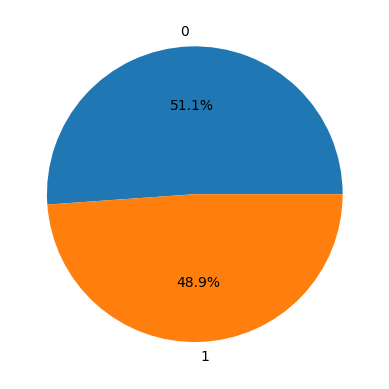

In [89]:
plt.pie(df['target'].value_counts().values,
		labels=[0, 1], autopct='%1.1f%%')
plt.show()

When we add features to our dataset we have to ensure that there are no highly correlated features as they do not help in the learning process of the algorithm.

In [94]:
stock_data = df[['Date', 'Close']]
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data = stock_data.set_index('Date')

In [95]:
# to find rolling mean or moving average
rolling_mean = stock_data['Close'].rolling(48).mean()
rolling_std = stock_data['Close'].rolling(48).std()

In [96]:
rolling_mean

Date
2010-06-29           NaN
2010-06-30           NaN
2010-07-01           NaN
2010-07-02           NaN
2010-07-06           NaN
                 ...    
2020-01-28    421.607293
2020-01-29    426.419793
2020-01-30    432.280002
2020-01-31    438.495627
2020-02-03    447.353336
Name: Close, Length: 2416, dtype: float64

In [97]:
rolling_std

Date
2010-06-29           NaN
2010-06-30           NaN
2010-07-01           NaN
2010-07-02           NaN
2010-07-06           NaN
                 ...    
2020-01-28     81.531141
2020-01-29     83.994235
2020-01-30     88.896981
2020-01-31     93.491624
2020-02-03    104.847549
Name: Close, Length: 2416, dtype: float64

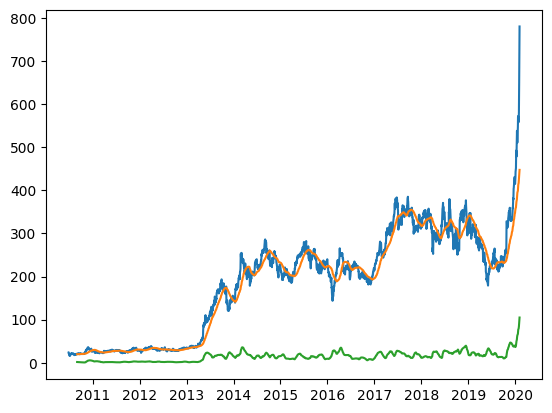

In [98]:
plt.plot(stock_data.Close)
plt.plot(rolling_mean)
plt.plot(rolling_std)

from the plot above, it is clear that time series is non stationary Lets reverify by statistical test as well >> ADF test

In [99]:
from statsmodels.tsa.stattools import adfuller
adft = adfuller(stock_data['Close'])
adft   # null hypothesis of adf test is time series is non stationary, pavalue<0.05, reject null hypothesis
# here p value > 0.05, it means series is non stationary

(1.4000685020861579,
 0.9971144530803391,
 18,
 2397,
 {'1%': -3.4330810457844425,
  '5%': -2.862746538733181,
  '10%': -2.567412291147901},
 16128.395638116252)

In [100]:
pd.Series(adft[0:4], index = ['test_statistics', 'p-value', 'lag', 'no of data points'])

test_statistics         1.400069
p-value                 0.997114
lag                    18.000000
no of data points    2397.000000
dtype: float64

In [101]:
# Test for stationary
def test_stationary(timeseries):
    # determing rolling statistics
    rolmean = timeseries.rolling(48).mean()  # rolling mean
    rolstd = timeseries.rolling(48).mean()  # rolling standard deviation
    # plot rolling statistics:
    plt.figure(figsize = (18,8))
    plt.grid('both')
    plt.plot(timeseries, color = 'blue', label = 'original', linewidth = 3)
    plt.plot(rolmean, color='red', label = 'rolling mean', linewidth = 3)
    plt.plot(rolstd, color = 'black', label = 'rolling std', linewidth = 2)
    plt.legend(loc = 'best', fontsize = 20, shadow= True, facecolor = 'lightpink', edgecolor = 'k')
    plt.title('rolling mean and standard deviation', fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show(block=False)

    print('Results of dickey fuller test')
    adft = adfuller(timeseries, autolag = 'AIC')
    # output for dft will give us without defining what the values are.
    # hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4], index= ['Test statistics','p-value', 'No. of lags used','number of observation used' ])
    for key, values in adft[4].items():
        output['critical value (%s)'%key] = values
    print(output)

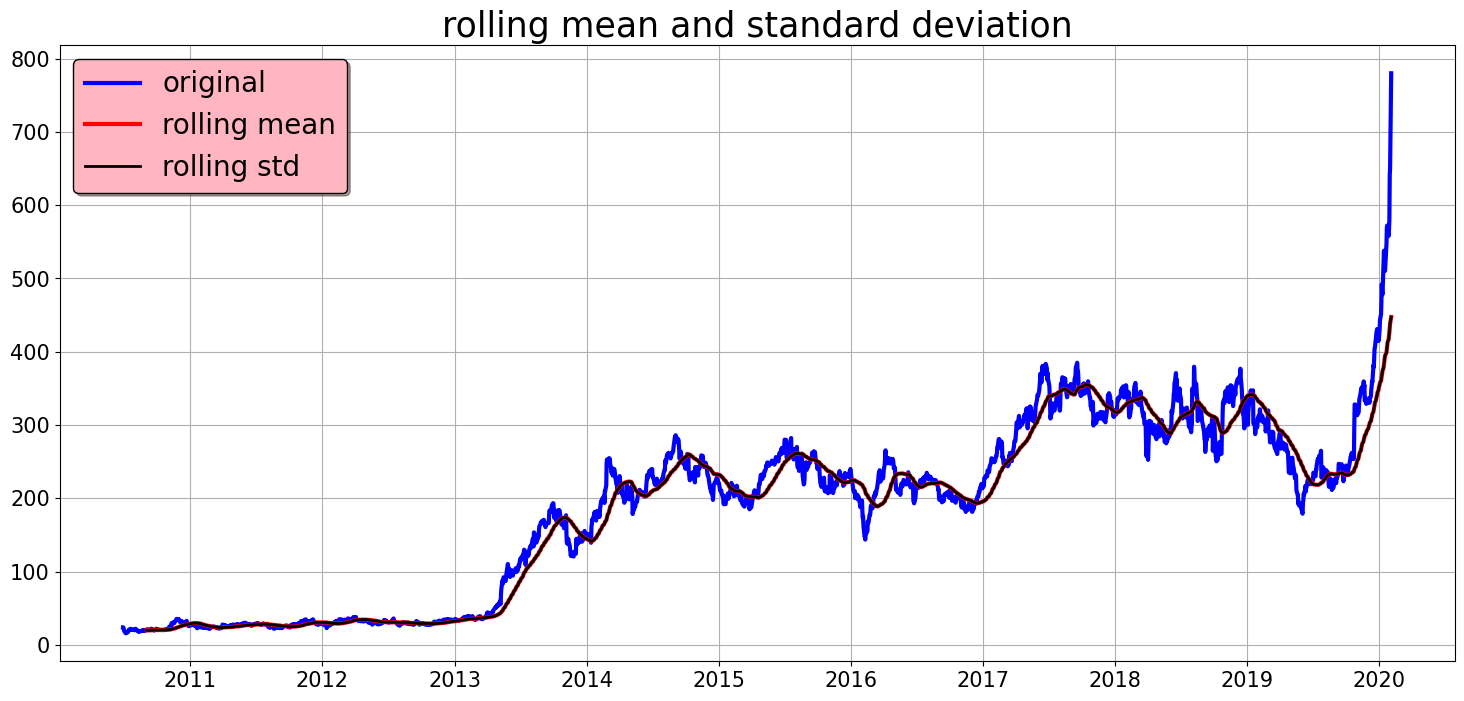

Results of dickey fuller test
Test statistics                  1.400069
p-value                          0.997114
No. of lags used                18.000000
number of observation used    2397.000000
critical value (1%)             -3.433081
critical value (5%)             -2.862747
critical value (10%)            -2.567412
dtype: float64


In [102]:
test_stationary(stock_data.Close)

In [103]:
# series is non stationary
# a time series is made up of level, trend, seasonlity, noise
# time series is of two types >> additive and multiplicative

from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(stock_data[['Close']], period = 12)  # for 12 months

In [104]:
result.seasonal

Date
2010-06-29    0.417565
2010-06-30    0.718269
2010-07-01    0.661280
2010-07-02   -0.237819
2010-07-06   -0.169230
                ...   
2020-01-28    0.077340
2020-01-29    0.417565
2020-01-30    0.718269
2020-01-31    0.661280
2020-02-03   -0.237819
Name: seasonal, Length: 2416, dtype: float64

In [105]:
result.trend

Date
2010-06-29   NaN
2010-06-30   NaN
2010-07-01   NaN
2010-07-02   NaN
2010-07-06   NaN
              ..
2020-01-28   NaN
2020-01-29   NaN
2020-01-30   NaN
2020-01-31   NaN
2020-02-03   NaN
Name: trend, Length: 2416, dtype: float64

<Figure size 2000x1000 with 0 Axes>

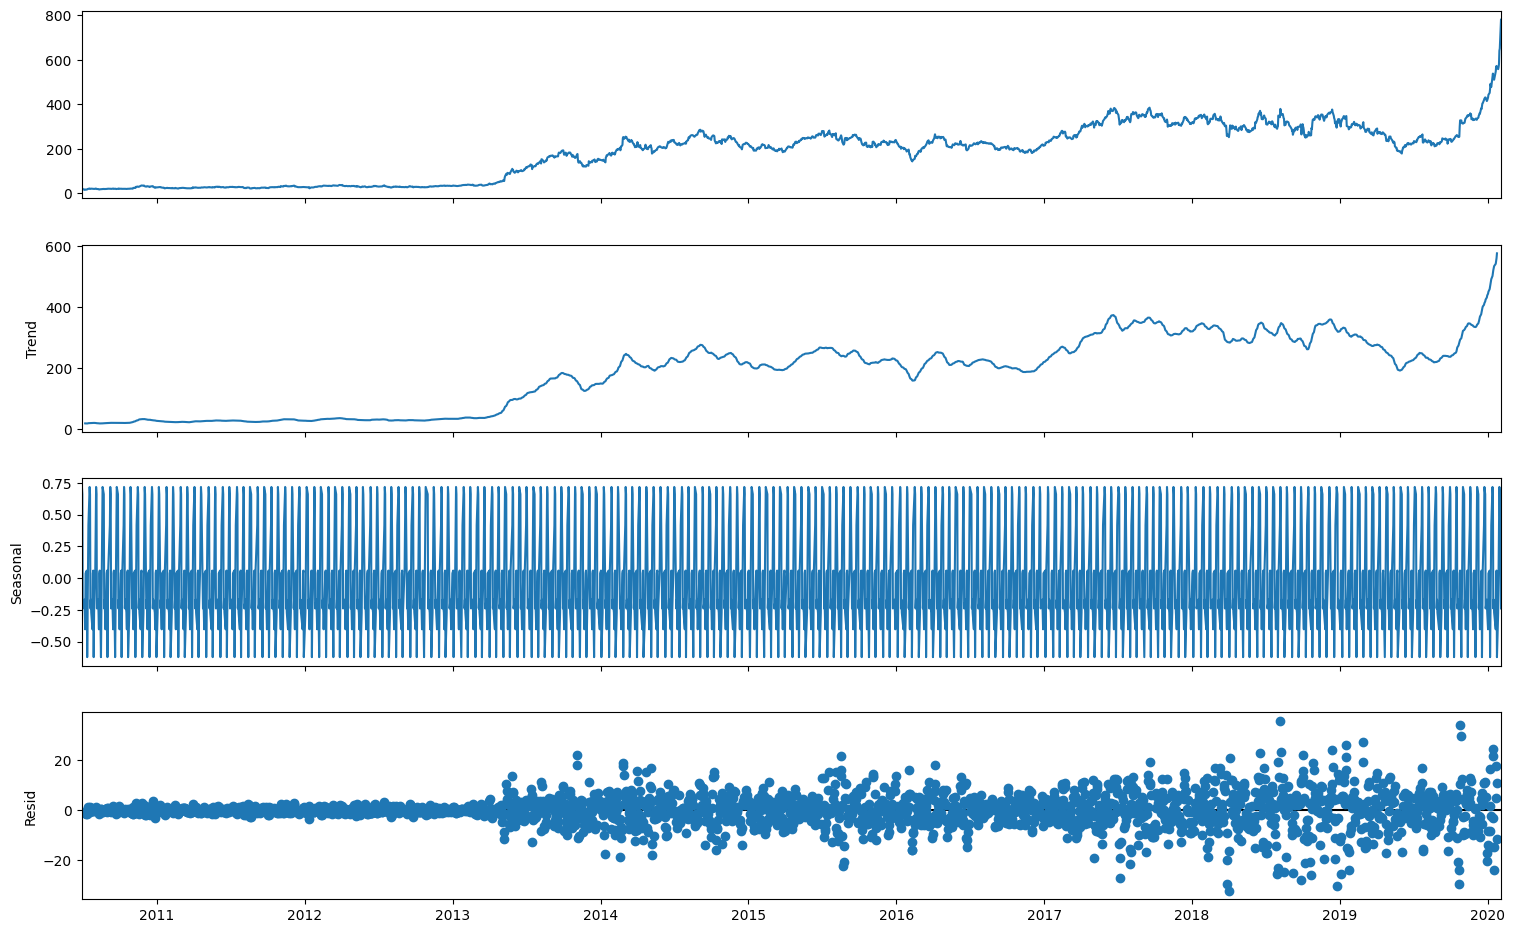

In [106]:
# visualisation
fig = plt.figure(figsize = (20,10))
fig = result.plot()
fig.set_size_inches(17,10)

<Figure size 2000x1000 with 0 Axes>

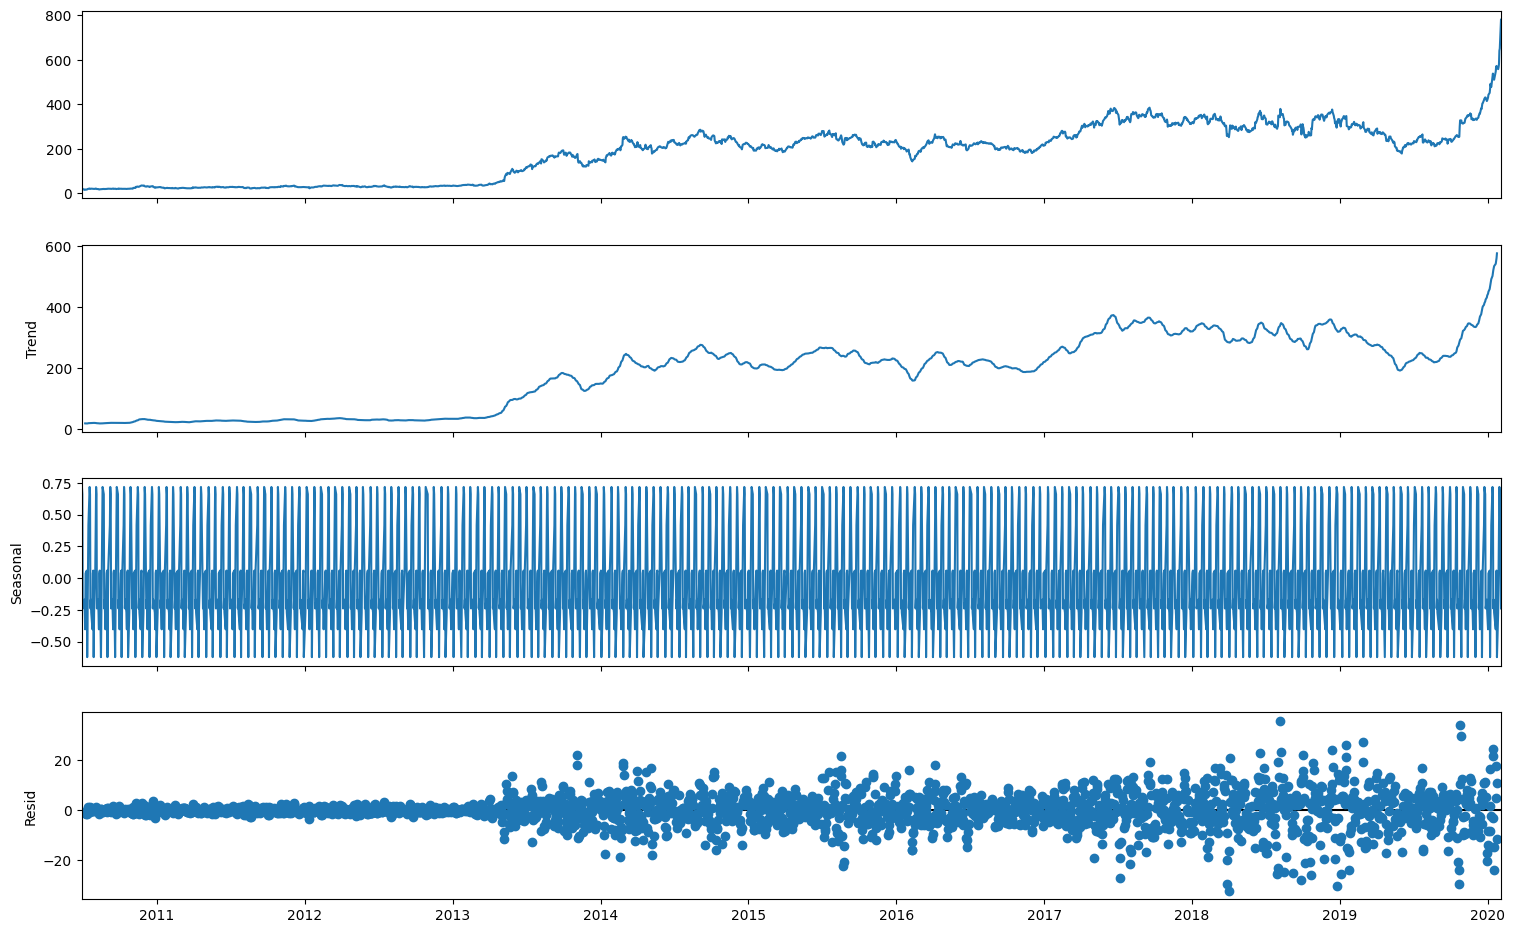

In [107]:
# additive
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(stock_data[['Close']], period = 12, model = 'additive')  # for 12 months
fig = plt.figure(figsize = (20,10))
fig = result.plot()
fig.set_size_inches(17,10)

<Figure size 2000x1000 with 0 Axes>

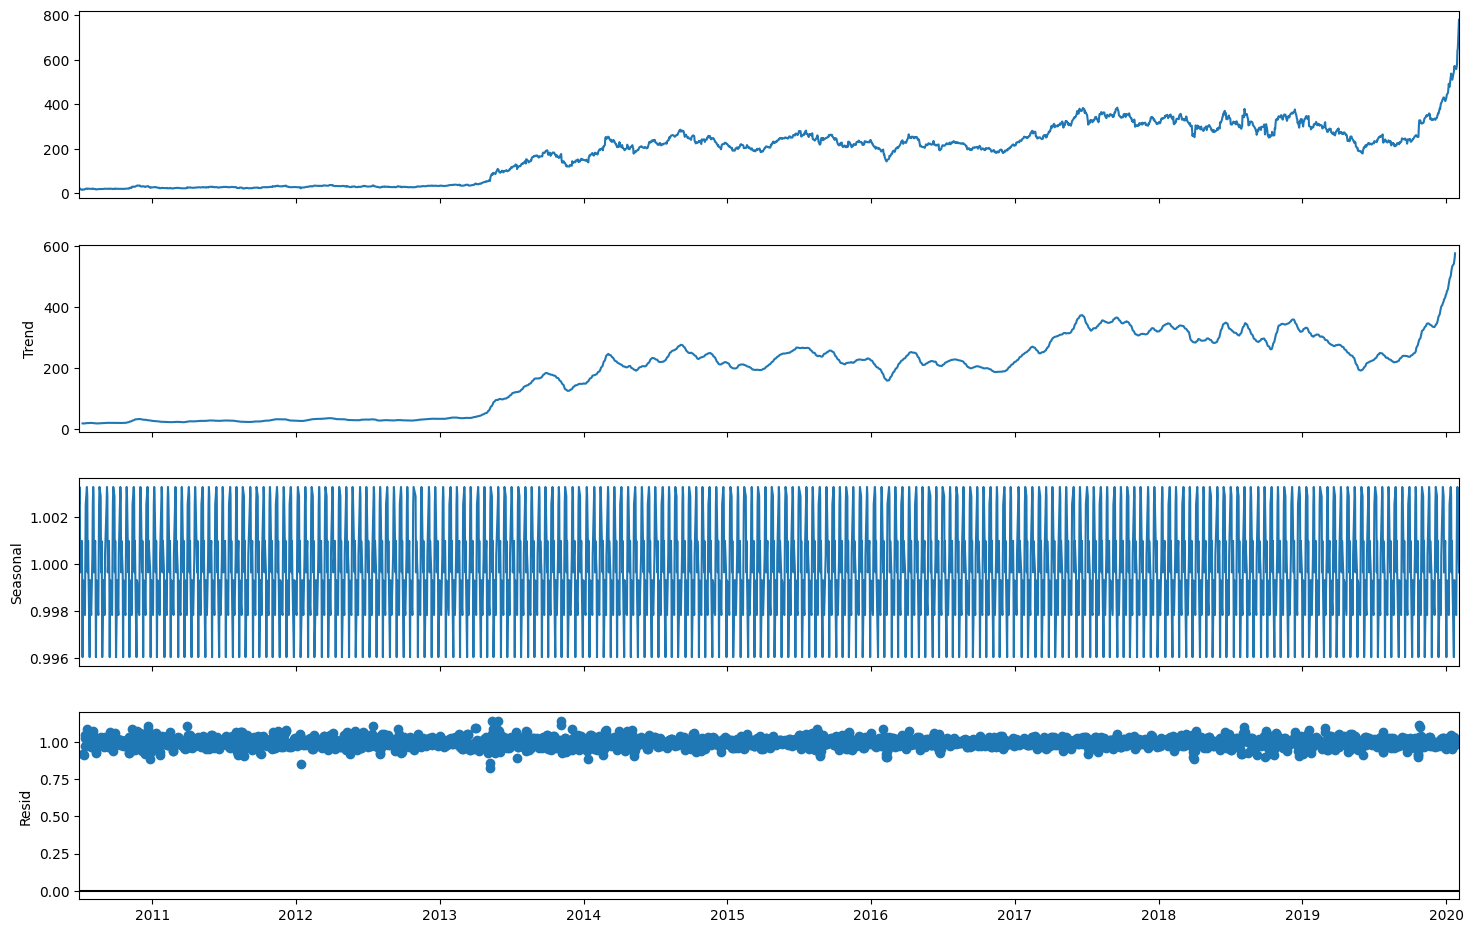

In [108]:
# multiplicative
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(stock_data[['Close']], period = 12, model = 'multiplicative')  # for 12 months
fig = plt.figure(figsize = (20,10))
fig = result.plot()
fig.set_size_inches(17,10)

<Axes: ylabel='Close'>

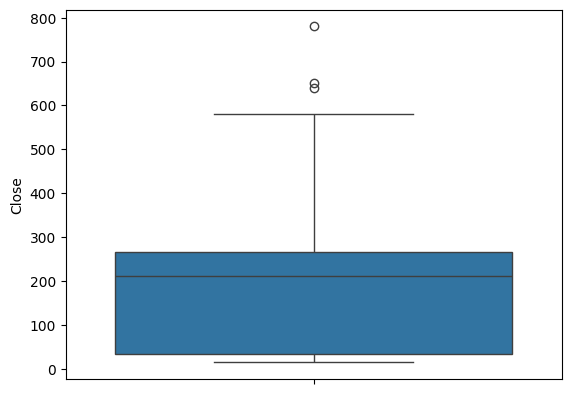

In [109]:
sns.boxplot(stock_data.Close)

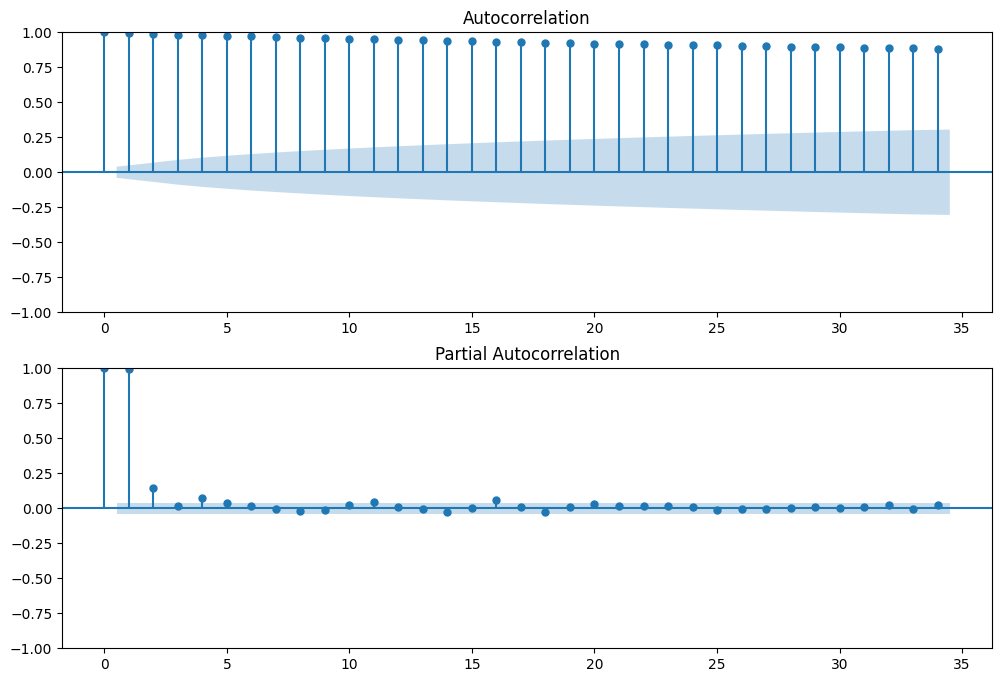

In [110]:
# ACF/ PACF plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(2,1,figsize = (12,8))
plot_acf(stock_data, ax = axes[0])
plot_pacf(stock_data, ax = axes[1])
plt.show()
# since series is non stationary, results are not good

In [111]:
# to make time series stationary >> differencing
df_close = stock_data.Close
df_close =df_close.diff()
df_close = df_close.dropna()
df_close

Date
2010-06-30     -0.059999
2010-07-01     -1.870001
2010-07-02     -2.759998
2010-07-06     -3.090000
2010-07-07     -0.310001
                 ...    
2020-01-28      8.880004
2020-01-29     14.089966
2020-01-30     59.820008
2020-01-31      9.760009
2020-02-03    129.429993
Name: Close, Length: 2415, dtype: float64

In [112]:
from statsmodels.tsa.stattools import adfuller
adft = adfuller(stock_data['Close'])
adft   # null hypothesis of adf test is time series is non stationary, pavalue<0.05, reject null hypothesis
# here p value > 0.05, it means series is non stationary

(1.4000685020861579,
 0.9971144530803391,
 18,
 2397,
 {'1%': -3.4330810457844425,
  '5%': -2.862746538733181,
  '10%': -2.567412291147901},
 16128.395638116252)

In [113]:
# Test for stationary
def test_stationary(timeseries):
    # determing rolling statistics
    rolmean = timeseries.rolling(48).mean()  # rolling mean
    rolstd = timeseries.rolling(48).mean()  # rolling standard deviation
    # plot rolling statistics:
    plt.figure(figsize = (18,8))
    plt.grid('both')
    plt.plot(timeseries, color = 'blue', label = 'original', linewidth = 3)
    plt.plot(rolmean, color='red', label = 'rolling mean', linewidth = 3)
    plt.plot(rolstd, color = 'black', label = 'rolling std', linewidth = 2)
    plt.legend(loc = 'best', fontsize = 20, shadow= True, facecolor = 'lightpink', edgecolor = 'k')
    plt.title('rolling mean and standard deviation', fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show(block=False)

    print('Results of dickey fuller test')
    adft = adfuller(timeseries, autolag = 'AIC')
    # output for dft will give us without defining what the values are.
    # hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4], index= ['Test statistics','p-value', 'No. of lags used','number of observation used' ])
    for key, values in adft[4].items():
        output['critical value (%s)'%key] = values
    print(output)

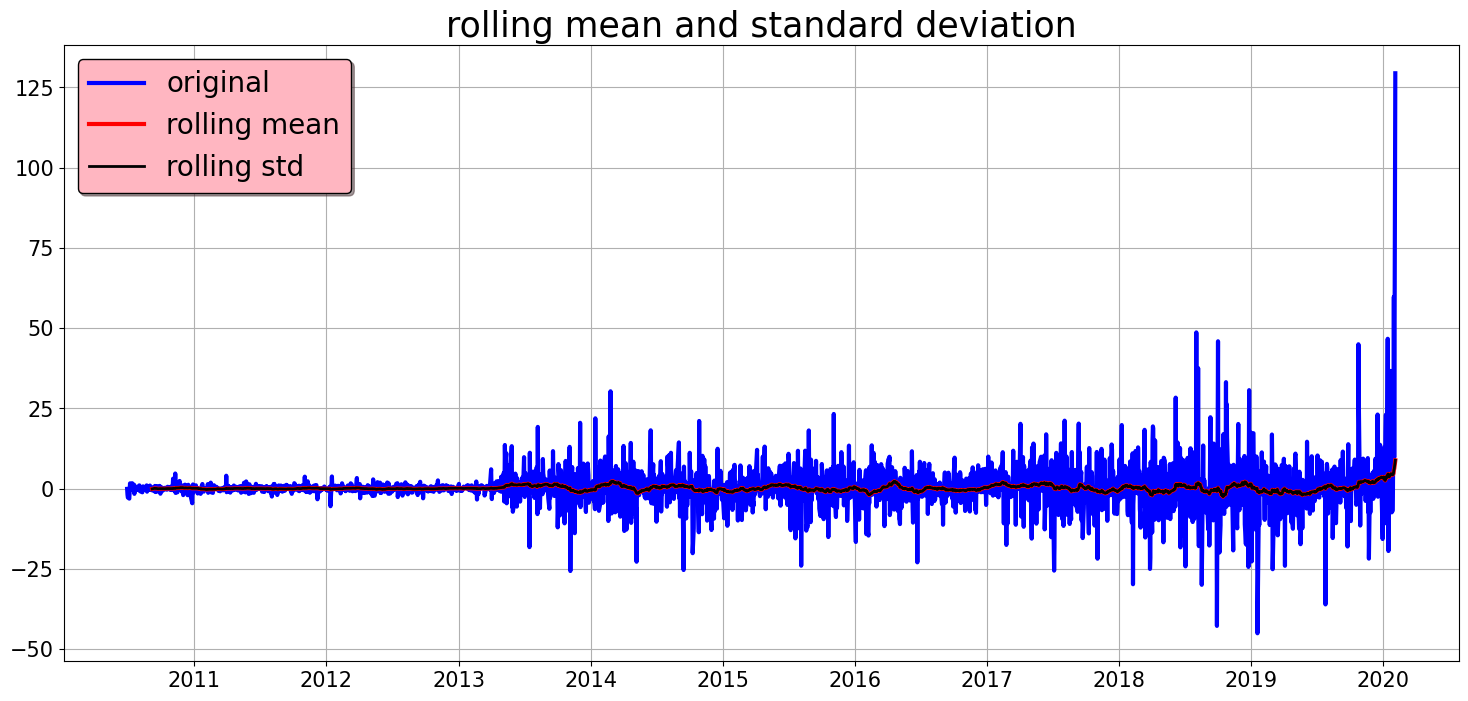

Results of dickey fuller test
Test statistics              -6.151177e+00
p-value                       7.555858e-08
No. of lags used              1.700000e+01
number of observation used    2.397000e+03
critical value (1%)          -3.433081e+00
critical value (5%)          -2.862747e+00
critical value (10%)         -2.567412e+00
dtype: float64


In [114]:
# now check again the stationarity
test_stationary(df_close)

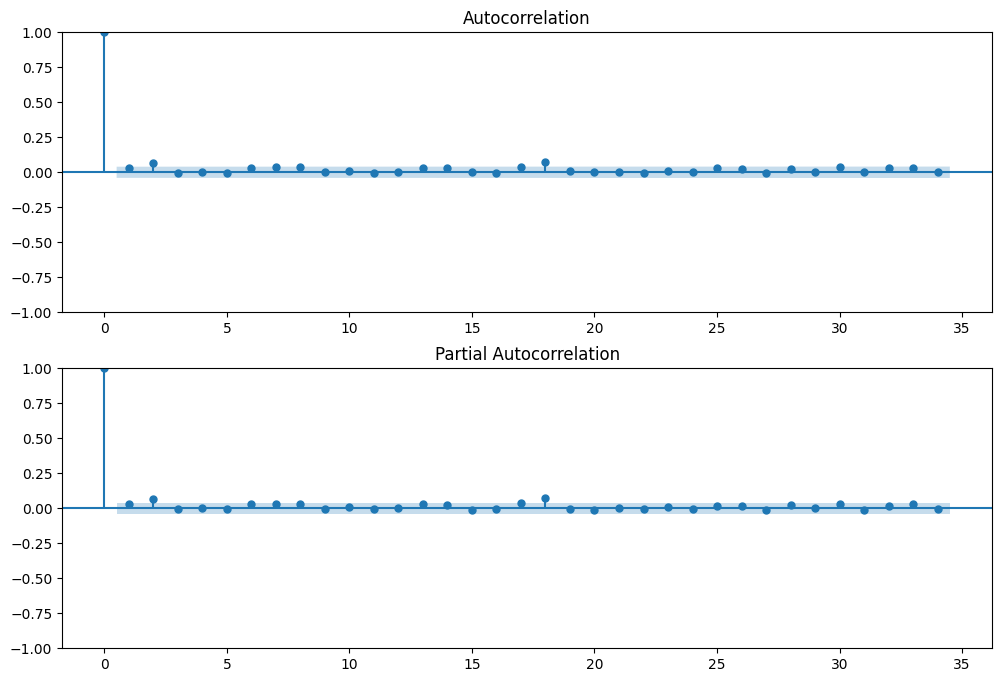

In [115]:
# now p-value < 0.05 , reject the null hypothesis>> time series is stationary, if not stationary then again differencing

# ACF/ PACF plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(2,1,figsize = (12,8))
plot_acf(df_close, ax = axes[0])
plot_pacf(df_close, ax = axes[1])
plt.show()
# since series is non stationary, results are not good

In [116]:
# in time series data , train test split happens based on time index
df_close

Date
2010-06-30     -0.059999
2010-07-01     -1.870001
2010-07-02     -2.759998
2010-07-06     -3.090000
2010-07-07     -0.310001
                 ...    
2020-01-28      8.880004
2020-01-29     14.089966
2020-01-30     59.820008
2020-01-31      9.760009
2020-02-03    129.429993
Name: Close, Length: 2415, dtype: float64

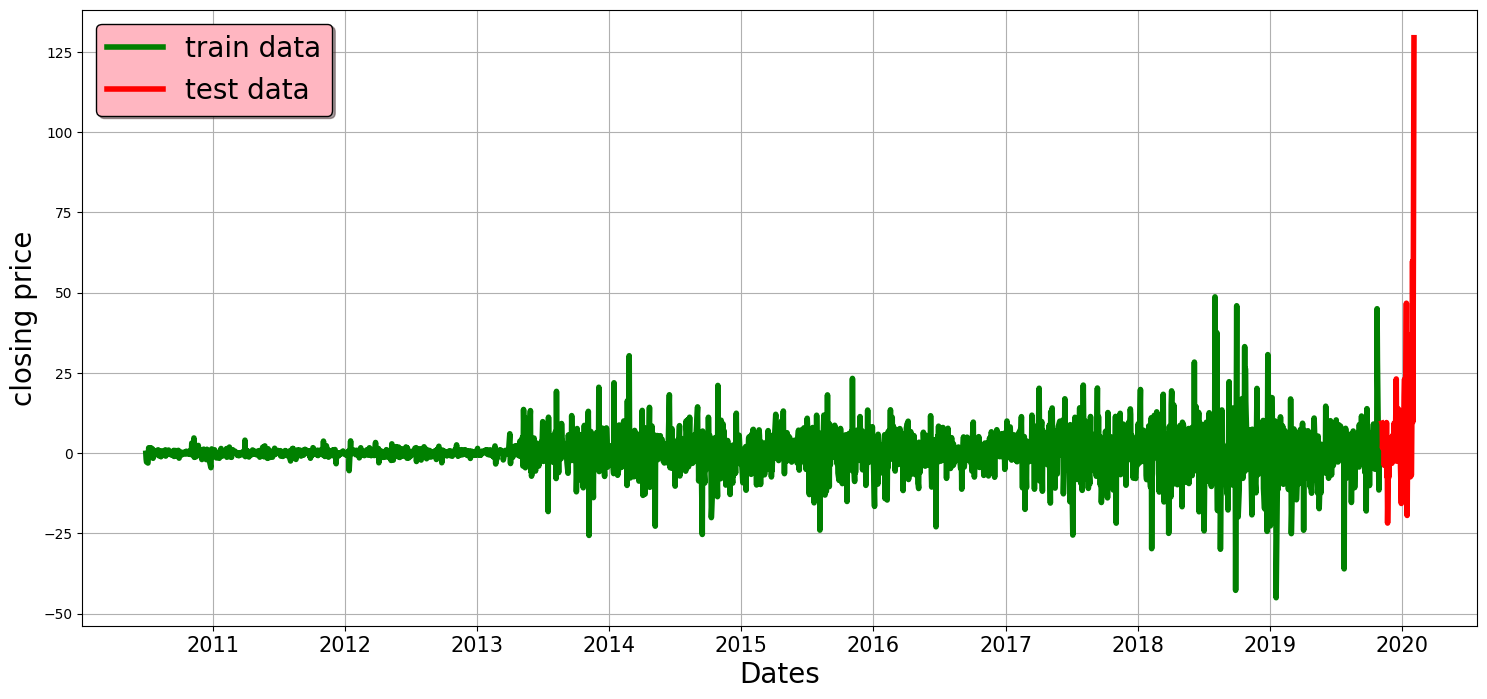

In [117]:
train_data = df_close[0:-60]   # all data except last 60 rows
test_data = df_close[-60:]
plt.figure(figsize = (18,8))
plt.grid(True)
plt.xlabel('Dates', fontsize = 20)
plt.ylabel('closing price', fontsize = 20)
plt.xticks(fontsize = 15)
plt.plot(train_data, 'green', label = 'train data', linewidth = 4)
plt.plot(test_data, 'red', label = 'test data', linewidth = 4)
plt.legend(fontsize = 20, shadow = True, facecolor = 'lightpink', edgecolor = 'k')

In [118]:
train_data.shape, test_data.shape

((2355,), (60,))

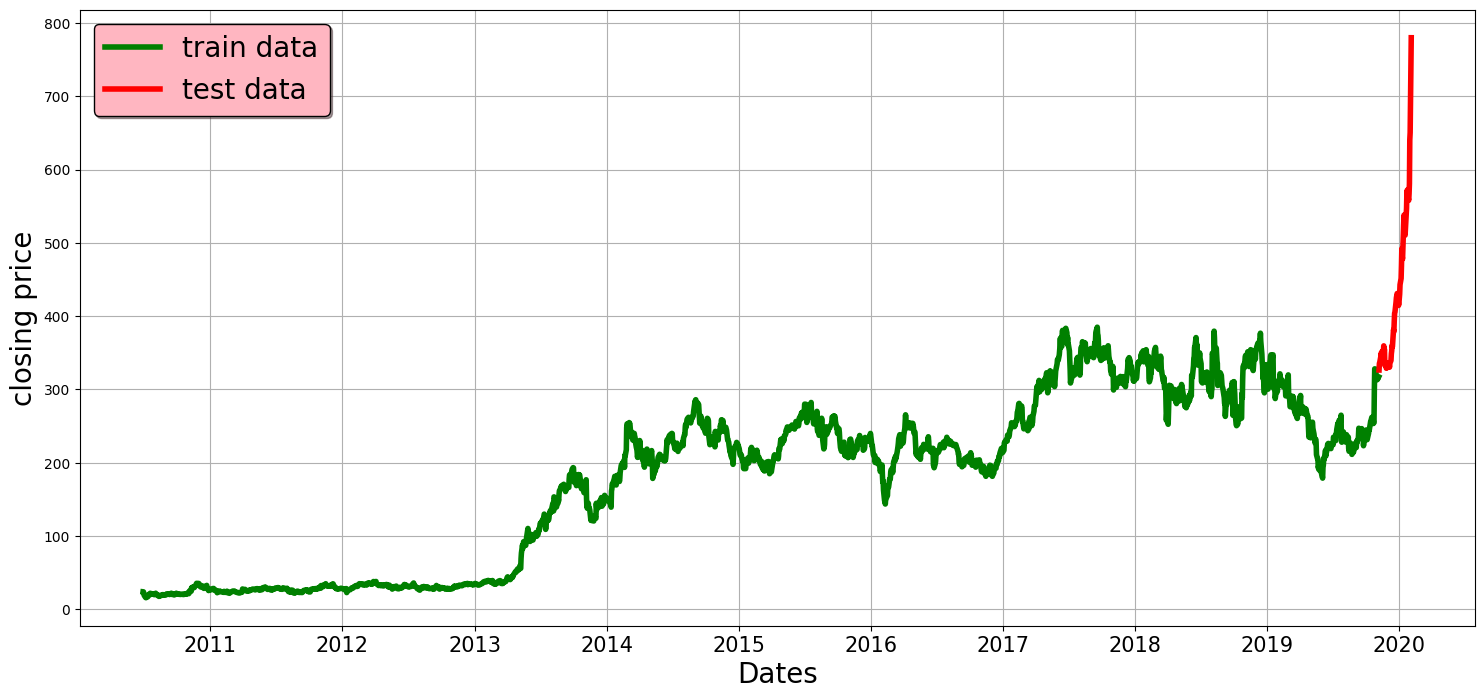

In [119]:
# now since we will use ARIMA, s0 we don't need stationary time series data
# why >> ARIMA itself has inherent differencing parameter,which will make the series stationary
# I >> integrated
# we will use original time series data

train_data = stock_data[0:-60]   # all data except last 60 rows
test_data = stock_data[-60:]
plt.figure(figsize = (18,8))
plt.grid(True)
plt.xlabel('Dates', fontsize = 20)
plt.ylabel('closing price', fontsize = 20)
plt.xticks(fontsize = 15)
plt.plot(train_data, 'green', label = 'train data', linewidth = 4)
plt.plot(test_data, 'red', label = 'test data', linewidth = 4)
plt.legend(fontsize = 20, shadow = True, facecolor = 'lightpink', edgecolor = 'k')

In [120]:
# lets start model building
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [121]:
history = train_data['Close']
history

Date
2010-06-29     23.889999
2010-06-30     23.830000
2010-07-01     21.959999
2010-07-02     19.200001
2010-07-06     16.110001
                 ...    
2019-10-30    315.010010
2019-10-31    314.920013
2019-11-01    313.309998
2019-11-04    317.470001
2019-11-05    317.220001
Name: Close, Length: 2356, dtype: float64

In [122]:
model = ARIMA(history, order = (1,1,1))  # order = (p,d,q) = (1,1,1)here

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [123]:
model = model.fit()

In [124]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 2356
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -7648.458
Date:                Mon, 05 Aug 2024   AIC                          15302.916
Time:                        19:41:05   BIC                          15320.208
Sample:                             0   HQIC                         15309.213
                               - 2356                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8907      0.128     -6.958      0.000      -1.142      -0.640
ma.L1          0.8807      0.133      6.643      0.000       0.621       1.141
sigma2        38.7670      0.465     83.286      0.000      37.855      39.679
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):              9765.88
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):              20.79   Skew:                             0.16
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [125]:
# for frocasting
model.forecast()  # it will give forecast of next immediate value
# predict is used for a range of values

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


2356    317.171113
dtype: float64

In [126]:
test_data = test_data['Close']
test_data

Date
2019-11-06    326.579987
2019-11-07    335.540009
2019-11-08    337.140015
2019-11-11    345.089996
2019-11-12    349.929993
2019-11-13    346.109985
2019-11-14    349.350006
2019-11-15    352.170013
2019-11-18    349.989990
2019-11-19    359.519989
2019-11-20    352.220001
2019-11-21    354.829987
2019-11-22    333.040009
2019-11-25    336.339996
2019-11-26    328.920013
2019-11-27    331.290009
2019-11-29    329.940002
2019-12-02    334.869995
2019-12-03    336.200012
2019-12-04    333.029999
2019-12-05    330.369995
2019-12-06    335.890015
2019-12-09    339.529999
2019-12-10    348.839996
2019-12-11    352.700012
2019-12-12    359.679993
2019-12-13    358.390015
2019-12-16    381.500000
2019-12-17    378.989990
2019-12-18    393.149994
2019-12-19    404.040009
2019-12-20    405.589996
2019-12-23    419.220001
2019-12-24    425.250000
2019-12-26    430.940002
2019-12-27    430.380005
2019-12-30    414.700012
2019-12-31    418.329987
2020-01-02    430.260010
2020-01-03    443.01

In [127]:
mean_squared_error([test_data[0]], model.forecast())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


88.52691290008275

In [128]:
np.sqrt(mean_squared_error([test_data[0]], model.forecast()))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


9.408874156884167

In [129]:
# we can treat p, d, q as hyperparameter
p_values = range(0,3)
d_values = range(0,3)
q_values = range(0,3)

for i in p_values:
    for j in d_values:
        for k in q_values:
            print(i, j, k)

0 0 0
0 0 1
0 0 2
0 1 0
0 1 1
0 1 2
0 2 0
0 2 1
0 2 2
1 0 0
1 0 1
1 0 2
1 1 0
1 1 1
1 1 2
1 2 0
1 2 1
1 2 2
2 0 0
2 0 1
2 0 2
2 1 0
2 1 1
2 1 2
2 2 0
2 2 1
2 2 2


In [130]:
def train_arima_model(x,y,arima_order):
    # prepare training dataset
    # make prediction list
    history = [x for X in x]
    predictions = list()
    for t in range(len(y)):
        model = ARIMA(history, order = arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
    # calculate out of sample error
    rmse = np.sqrt(mean_squared_error(y, predictions))
    return rmse


def evaluate_models(dataset, test, p_values, d_values, q_values):
    if isinstance(dataset, pd.DataFrame):
        dataset = dataset['Close']
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = train_arima_model(dataset,test,order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order, rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [131]:
evaluate_models(train_data, test_data, p_values, d_values, q_values)

Best ARIMANone RMSE=inf


In [132]:
history = [X for X in train_data['Close']]
predictions = list()
conf_list = list()
for t in range(len(test_data)):
    model = ARIMA(history, order = (2,0,0))
    model_fit = model.fit()
    fc = model_fit.forecast(alpha = 0.05)
    predictions.append(fc)
    history.append(test_data[t])
print('RMSE of ARIMA model:', np.sqrt(mean_squared_error(test_data, predictions)))

RMSE of ARIMA model: 22.14331122513601


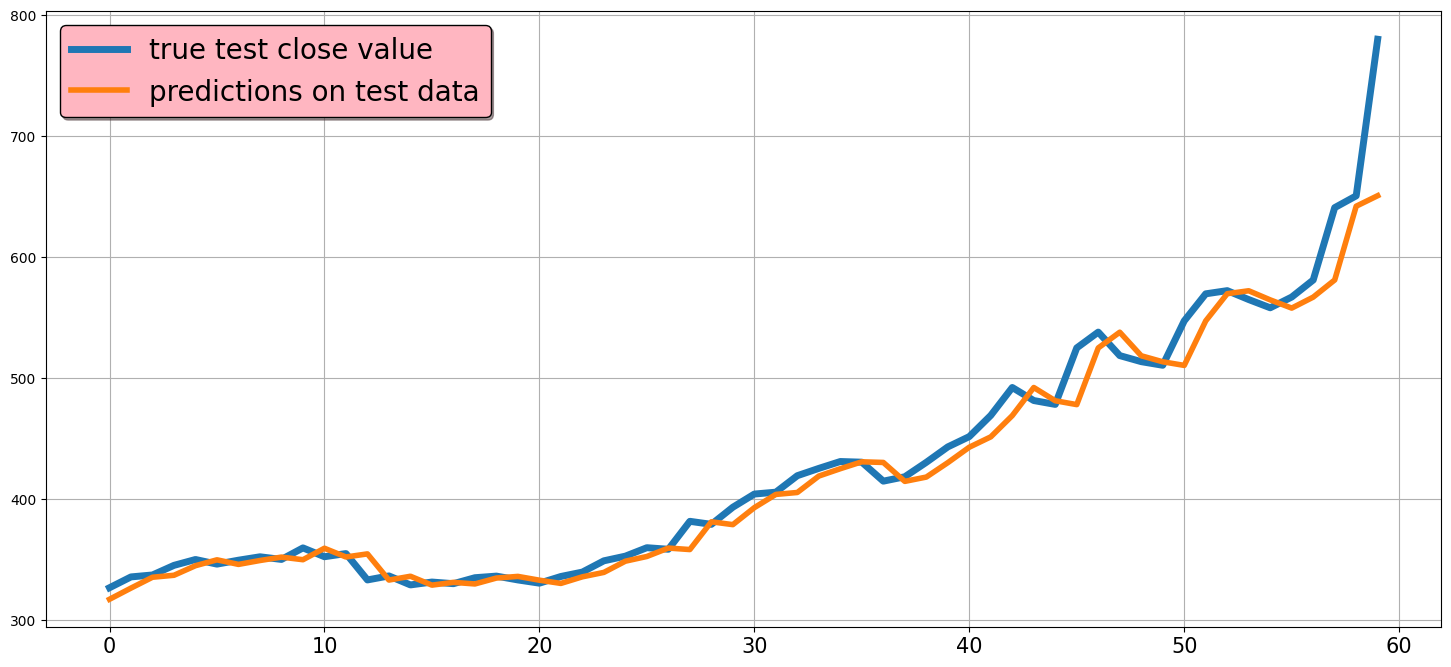

In [133]:
plt.figure(figsize = (18,8))
plt.grid(True)
plt.plot(range(len(test_data)), test_data, label = 'true test close value', linewidth = 5)
plt.plot(range(len(predictions)), predictions, label = 'predictions on test data', linewidth = 4)
plt.xticks(fontsize = 15)
plt.legend(fontsize = 20, shadow = True, facecolor = 'lightpink', edgecolor = 'k')
plt.show()

In [134]:
# this is forecasted series
fc_series = pd.Series(predictions, index = test_data.index)
fc_series

Date
2019-11-06     [317.0451336323813]
2019-11-07     [326.3005724634943]
2019-11-08     [335.2638925365009]
2019-11-11     [336.8961512542543]
2019-11-12     [344.8148623608769]
2019-11-13    [349.66736736772583]
2019-11-14    [345.88254639965595]
2019-11-15    [349.09296901806704]
2019-11-18     [351.9137699916536]
2019-11-19     [349.7549026295749]
2019-11-20     [359.2315508203594]
2019-11-21    [352.01174470105593]
2019-11-22    [354.57087688547506]
2019-11-25    [332.93278520854483]
2019-11-26     [336.0827175884041]
2019-11-27    [328.74120785140775]
2019-11-29     [331.0419342304694]
2019-12-02     [329.7194805366751]
2019-12-03    [334.60084395523097]
2019-12-04     [335.9559345501738]
2019-12-05    [332.82046645161245]
2019-12-06     [330.1588622626648]
2019-12-09     [335.6162295236509]
2019-12-10    [339.26810039426357]
2019-12-11    [348.53611601477894]
2019-12-12     [352.4318528425395]
2019-12-13    [359.39157701006184]
2019-12-16     [358.1512797231403]
2019-12-17     

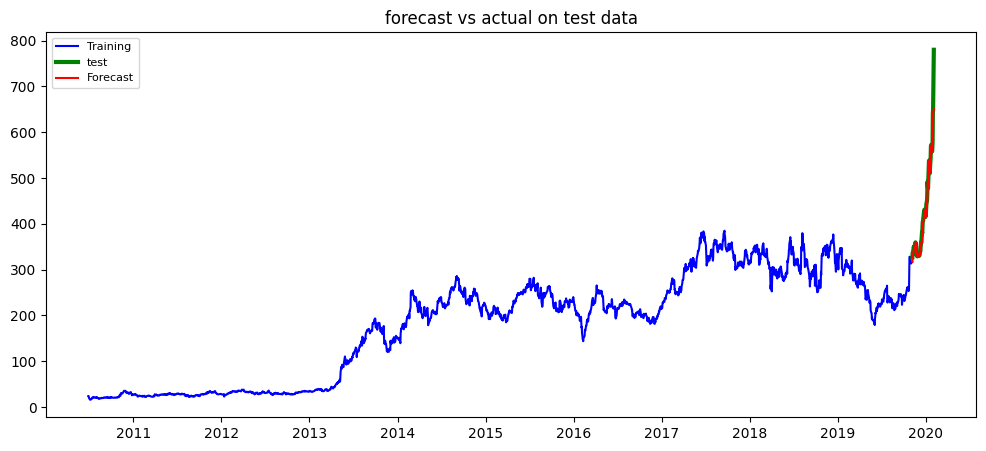

In [135]:
# forecast value with actual test data

plt.figure(figsize=(12,5), dpi = 100)
plt.plot(train_data['Close'], label = 'Training', color = 'blue')
plt.plot(test_data, label= 'test', color = 'green', linewidth = 3)
plt.plot(fc_series, label = 'Forecast', color = 'red')
plt.title('forecast vs actual on test data')
plt.legend(loc = 'upper left', fontsize = 8)
plt.show()

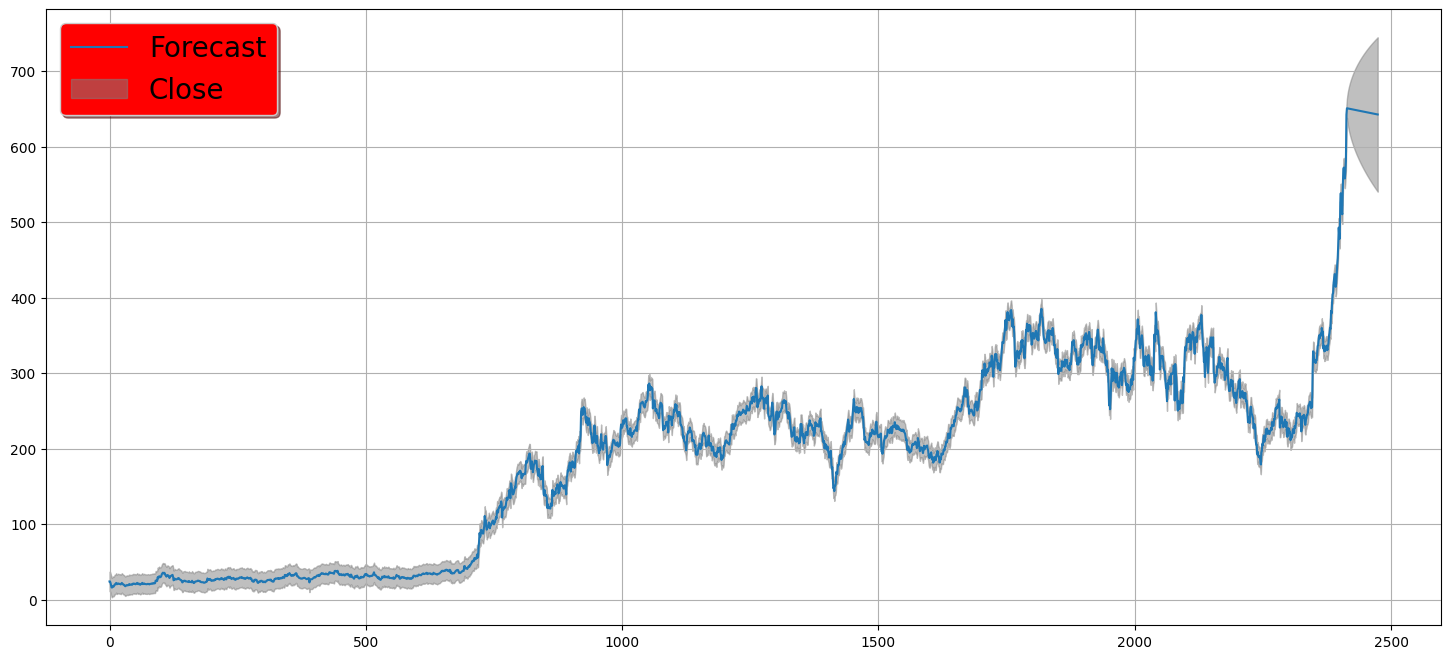

In [136]:
# we can make forecast beyond the test data
from statsmodels.graphics.tsaplots import plot_predict
fig = plt.figure(figsize = (18,8))
ax1 = fig.add_subplot(111)
plot_predict(result = model_fit, start= 1, end = len(df_close)+60, ax = ax1)
plt.grid('both')
plt.legend(['Forecast', 'Close', '95% confidenec interval'], fontsize = 20, shadow = True, facecolor = 'red')
plt.show()